In [4]:
"""
Булешний Михайло та Іванишин Ігор
"""

'\nБулешний Михайло та Іванишин Ігор\n'

In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import time
from tqdm import tqdm
import math
from networkx.algorithms import floyd_warshall_predecessor_and_distance
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import tree
import matplotlib.pyplot as plt

In [8]:
# We uses this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

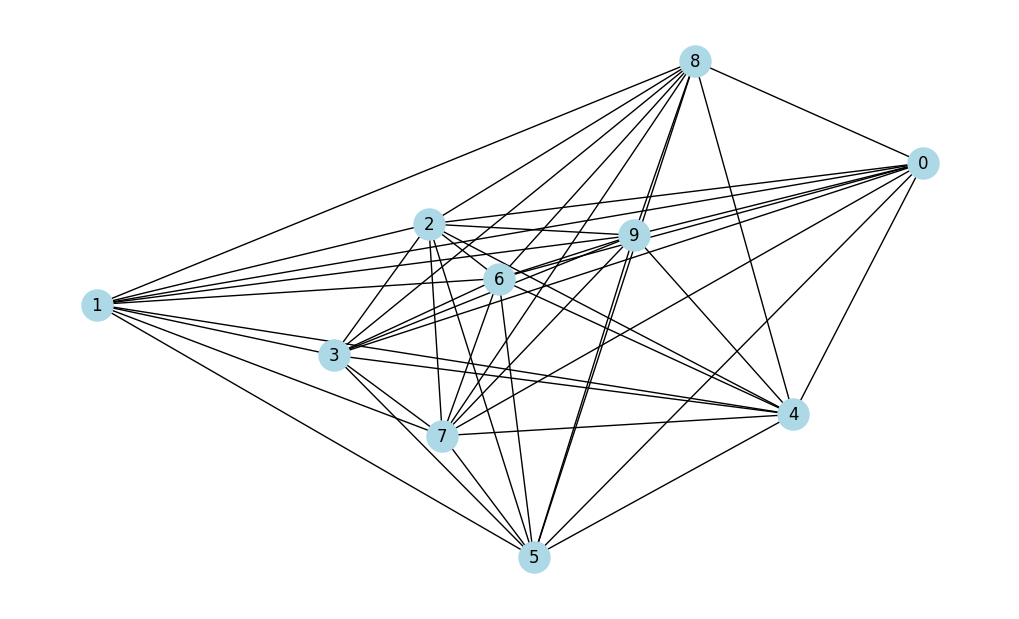

In [9]:
G = gnp_random_connected_graph(10, 7, False, True)

In [ ]:
#Prima's algoritm

In [6]:
def get_min(edges, nodes):
    """
    Get minimum available edge
    """
    return sorted(edges, key=lambda x: x[2]["weight"] if (x[0] in nodes or x[1] in nodes) and (x[0] not in nodes or x[1] not in nodes) else math.inf)[0]

In [10]:
def prima(graph,start):
    """
    Prima algorithm
    """
    vidpov = []
    while len(start) < len(graph.nodes()):
        rebro = get_min(graph.edges(data=True), start)
        vidpov.append(rebro)
        start.add(rebro[0])
        start.add(rebro[1])
    return vidpov
prima(gnp_random_connected_graph(10,0.7,False), {1})

[(1, 4, {'weight': -2}),
 (1, 6, {'weight': 2}),
 (2, 6, {'weight': -2}),
 (2, 7, {'weight': -5}),
 (7, 9, {'weight': -5}),
 (0, 2, {'weight': 2}),
 (0, 3, {'weight': -3}),
 (3, 8, {'weight': 2}),
 (5, 8, {'weight': 1})]

In [31]:
def compare_prima_speed():
    """
    compare prima speed
    """
    NUM_OF_ITERATIONS = 3
    time_taken = 0
    time_taken1 = 0
    sizes=[10,20,50,100,200]
    for size in sizes:
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            G = gnp_random_connected_graph(size, 0.4, False)
            start = time.time()
            tree.minimum_spanning_tree(G, algorithm="prim")
            end = time.time()
            time_taken += end - start
            start1 = time.time()
            prima(G,{1})
            end1 = time.time()
            time_taken1 += end1 - start1
        print(time_taken / NUM_OF_ITERATIONS,"-Algoritm in python")
        print(time_taken1/ NUM_OF_ITERATIONS,"-Our algoritm")
compare_prima_speed()


100%|██████████| 3/3 [00:00<00:00, 602.34it/s]


0.000663598378499349 -Algoritm in python
0.0007747014363606771 -Our algoritm


100%|██████████| 3/3 [00:00<00:00, 100.70it/s]


0.0019900004069010415 -Algoritm in python
0.007526079813639323 -Our algoritm


100%|██████████| 3/3 [00:00<00:00, 11.31it/s]


0.0043604373931884766 -Algoritm in python
0.08772500356038411 -Our algoritm


100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


0.013919750849405924 -Algoritm in python
0.8636953035990397 -Our algoritm


100%|██████████| 3/3 [00:19<00:00,  6.53s/it]

0.04555360476175944 -Algoritm in python
7.279873609542847 -Our algoritm


In [ ]:
#Kruskal's algoritm

In [19]:
def checkcycles(edge,components):
    """
    Checks cycles
    """
    for i in components:
        if edge[0] in i and edge[1] in i:
            return False
    return True

In [20]:
def kruscal_algorithm(graph) -> list:
    """
    Kruscal algorithm
    """
    edges=graph.edges(data = True)
    edges=sorted(edges,key=lambda x: x[2]["weight"])
    components=[[i] for i in range(len(graph.nodes()))]
    min_exp_tree=[]
    for i in edges:
        if checkcycles(i, components):
            first_node_component=0
            second_node_component=0
            for index_comp,component in enumerate(components):
                if i[0] in component:
                    first_node_component=index_comp
                if i[1] in component:
                    second_node_component=index_comp
            buf_first=components[first_node_component]
            buf_second=components[second_node_component]
            components=list(filter(lambda x : x not in [buf_first,buf_second],components))
            components.insert(0,buf_first+buf_second)
            min_exp_tree.append(i)
    return min_exp_tree
kruscal_algorithm(gnp_random_connected_graph(10,0.7,False))

[(1, 4, {'weight': -5}),
 (4, 5, {'weight': -5}),
 (7, 9, {'weight': -5}),
 (8, 9, {'weight': -4}),
 (2, 8, {'weight': -3}),
 (5, 6, {'weight': -3}),
 (0, 3, {'weight': -2}),
 (3, 5, {'weight': -2}),
 (3, 7, {'weight': 0})]

In [21]:
def compare_method_kruscal_algorithm():
    NUM_OF_ITERATIONS = 3
    sizes=[10,20,50,100,500,1000]
    for j in sizes:
        time_taken_built_in=0
        time_taken_our=0
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            # note that we should not measure time of graph creation
            G = gnp_random_connected_graph(j, 0.5, False)
            start_built_in = time.time()
            tree.minimum_spanning_tree(G, algorithm="kruskal")
            end_built_in = time.time()
            start_our = time.time()
            kruscal_algorithm(G)
            end_our = time.time()
            time_taken_built_in += end_built_in - start_built_in
            time_taken_our+=end_our-start_our
        print(str(time_taken_built_in / NUM_OF_ITERATIONS)+" - built in method")
        print(str(time_taken_our / NUM_OF_ITERATIONS)+" - our method")
compare_method_kruscal_algorithm()

100%|██████████| 3/3 [00:00<00:00, 372.28it/s]


0.0006120999654134115 - built in method
0.0006636778513590494 - our method


100%|██████████| 3/3 [00:00<00:00, 214.78it/s]


0.0016633669535319011 - built in method
0.0013056596120198567 - our method


100%|██████████| 3/3 [00:00<00:00, 37.44it/s]


0.009215275446573893 - built in method
0.009294907251993815 - our method


100%|██████████| 3/3 [00:00<00:00, 10.05it/s]


0.02925284703572591 - built in method
0.035588741302490234 - our method


100%|██████████| 3/3 [00:05<00:00,  1.73s/it]


0.4012168248494466 - built in method
0.9324462413787842 - our method


100%|██████████| 3/3 [00:29<00:00,  9.95s/it]

1.6310900052388508 - built in method
6.764118591944377 - our method


In [22]:
# Bellman's Ford algoritm

In [23]:
def bellman_ford(start,graph):
    """
    Bellman Ford algorithm
    """
    edges=graph.edges(data=True)
    nodes_len=graph.nodes()
    distance=[math.inf for i in range(len(graph.nodes()))]
    distance[start]=0
    dictionary={}
    for i in edges:
        if i[1] in dictionary:
            dictionary[i[1]].append((i[0],i[2]["weight"]))
        else:
            dictionary[i[1]] = [(i[0],i[2]["weight"])]
    for i in edges:
        if i[0] == start:
            distance[i[1]] = i[2]["weight"]
    for iteration in range(len(nodes_len)):
        for i in range(len(nodes_len)):
            if i in dictionary:
                for j in dictionary[i]:
                    if distance[i]>distance[j[0]]+j[1]:
                        if iteration==len(nodes_len)-1:
                            print("Negative cycle_our_method")
                            return
                        distance[i]=distance[j[0]]+j[1]
    return distance
bellman_ford(1, gnp_random_connected_graph(10,0.7,False))

[inf, 0, -5, -4, 0, 2, -5, -3, -5, -3]

In [24]:
def compare_methods_bellman_ford():
    NUM_OF_ITERATIONS = 3
    sizes=[10,20,50,100,200,400]
    for j in sizes:
        time_taken_built_in=0
        time_taken_our=0
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            G = gnp_random_connected_graph(j, 0.5,True, False)
            start_built_in = time.time()
            try:
                pred, dist = bellman_ford_predecessor_and_distance(G, 0)
            except:
                print("Negative cycle detected")
            end_built_in = time.time()
            start_our = time.time()
            bellman_ford(0,G)
            end_our = time.time()
            time_taken_built_in += end_built_in - start_built_in
            time_taken_our+=end_our-start_our
        print(str(time_taken_built_in / NUM_OF_ITERATIONS)+" - built in method")
        print(str(time_taken_our / NUM_OF_ITERATIONS)+" - our method")
compare_methods_bellman_ford()

100%|██████████| 3/3 [00:00<00:00, 431.96it/s]


Negative cycle detected
Negative cycle_our_method
0.0010202725728352864 - built in method
0.000322421391805013 - our method


100%|██████████| 3/3 [00:00<00:00, 106.23it/s]


Negative cycle detected
Negative cycle_our_method
Negative cycle detected
Negative cycle_our_method
Negative cycle detected
Negative cycle_our_method
0.004390239715576172 - built in method
0.0026879310607910156 - our method


 33%|███▎      | 1/3 [00:00<00:00,  8.83it/s]

Negative cycle detected
Negative cycle_our_method
Negative cycle detected


100%|██████████| 3/3 [00:00<00:00, 15.61it/s]

Negative cycle_our_method
Negative cycle detected
Negative cycle_our_method


0.026715993881225586 - built in method
0.03205728530883789 - our method


  0%|          | 0/3 [00:00<?, ?it/s]

Negative cycle detected


 33%|███▎      | 1/3 [00:00<00:00,  3.31it/s]

Negative cycle_our_method


 67%|██████▋   | 2/3 [00:00<00:00,  2.51it/s]

Negative cycle detected
Negative cycle_our_method


100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


Negative cycle detected
Negative cycle_our_method
0.1878391901652018 - built in method
0.15919915835062662 - our method


  0%|          | 0/3 [00:00<?, ?it/s]

Negative cycle detected


 33%|███▎      | 1/3 [00:01<00:03,  1.84s/it]

Negative cycle_our_method
Negative cycle detected


 67%|██████▋   | 2/3 [00:03<00:01,  1.67s/it]

Negative cycle_our_method
Negative cycle detected


100%|██████████| 3/3 [00:05<00:00,  1.72s/it]


Negative cycle_our_method
0.8134121100107828 - built in method
0.8596309820810953 - our method


  0%|          | 0/3 [00:00<?, ?it/s]

Negative cycle detected


 33%|███▎      | 1/3 [00:12<00:25, 12.69s/it]

Negative cycle_our_method
Negative cycle detected


 67%|██████▋   | 2/3 [00:27<00:13, 13.84s/it]

Negative cycle_our_method
Negative cycle detected


100%|██████████| 3/3 [00:41<00:00, 13.98s/it]

Negative cycle_our_method
6.389237880706787 - built in method
7.38898237546285 - our method


In [25]:
# Floyd's Wharshal

In [26]:
def floyd_warshall(graph):
    """
    Floyd Warshall algorithm
    """
    edges=graph.edges(data = True)
    matrix=[[math.inf if i!=j else 0 for j in range(len(graph.nodes()))] for i in range(len(graph.nodes()))]
    for i in edges:
        matrix[i[0]][i[1]]=i[2]["weight"]
    for k in range(len(matrix)):
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][j] > matrix[i][k]+matrix[k][j]:
                    matrix[i][j] = matrix[i][k] + matrix[k][j]
    for i in range(len(matrix)):
        if matrix[i][i]!=0:
            return "Negative cycle detected"
    return matrix
floyd_warshall(gnp_random_connected_graph(10,0.7,False))

[[0, 15, 7, -2, 4, -2, 0, -6, -7, -9],
 [inf, 0, 9, inf, -3, 5, 10, 4, 0, 0],
 [inf, inf, 0, inf, -3, -4, 16, 9, -9, -5],
 [inf, inf, inf, 0, 7, 0, 18, -4, -5, -7],
 [inf, inf, inf, inf, 0, 11, inf, inf, 6, 18],
 [inf, inf, inf, inf, inf, 0, inf, inf, -5, 7],
 [inf, inf, inf, inf, inf, inf, 0, inf, -1, -3],
 [inf, inf, inf, inf, inf, inf, inf, 0, 9, -3],
 [inf, inf, inf, inf, inf, inf, inf, inf, 0, 20],
 [inf, inf, inf, inf, inf, inf, inf, inf, inf, 0]]

In [27]:
def compare_methods_floyd_wharshall():
    NUM_OF_ITERATIONS = 3
    sizes=[10,20,50,100,200]
    for j in sizes:
        time_taken_built_in=0
        time_taken_our=0
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            G = gnp_random_connected_graph(j, 0.8,True, False)
            start_built_in = time.time()
            try:
                floyd_warshall_predecessor_and_distance(G)
            except:
                print("Negative cycle detected")
            end_built_in = time.time()
            start_our = time.time()
            floyd_warshall(G)
            end_our = time.time()
            time_taken_built_in += end_built_in - start_built_in
            time_taken_our+=end_our-start_our
        print(str(time_taken_built_in / NUM_OF_ITERATIONS)+" - built in method")
        print(str(time_taken_our / NUM_OF_ITERATIONS)+" - our method")
compare_methods_floyd_wharshall()

100%|██████████| 3/3 [00:00<00:00, 374.37it/s]


0.001009543736775716 - built in method
0.0009926954905192058 - our method


100%|██████████| 3/3 [00:00<00:00, 73.36it/s]


0.006219307581583659 - built in method
0.0057392120361328125 - our method


100%|██████████| 3/3 [00:00<00:00,  9.42it/s]


0.04815316200256348 - built in method
0.05138127009073893 - our method


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


0.37748241424560547 - built in method
0.4058654308319092 - our method


100%|██████████| 3/3 [00:20<00:00,  6.91s/it]

3.241661548614502 - built in method
3.604057709376017 - our method
